# 18. 딥러닝 들여다보기

## 학습목표
- 딥러닝 문제 구성에 대한 기본적인 이해를 높인다.
- Neural Network에 사용되는 용어들에 대한 이해를 높인다.
- 딥러닝 프레임워크를 사용하지 않고, Numpy만을 이용해 딥러닝 모델과 훈련 과정을 직접 구현해 본다.

---

## 18.2 신경망 구성 (1) 개요

### 신경망이란?
- 뇌에는 1000억 개에 가까운 신경계 뉴런들이 있다고 한다. 이 뉴런들은 서로 매우 복잡하게 얽혀 있고, 조금 물러서서 보면 하나의 거대한 그물망과 같은 형태를 이루고 있습니다. 보통 우리는 이를 신경망이라고 부른다

### 퍼셉트론
- 머신러닝/딥러닝 과학자들도 자연에서 답을 찾으려 노력했고, 우리 뇌 속의 신경망 구조에 착안해서 퍼셉트론(Perceptron)이라는 형태를 제안하며 이를 연결한 형태를 인공신경망(Artificial Neural Network)이라고 부르기 시작했다.

### MNIST Revisited

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4978 - accuracy: 0.8799
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2329 - accuracy: 0.9340
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1830 - accuracy: 0.9482
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1527 - accuracy: 0.9561
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1317 - accuracy: 0.9620
Epoc

### 다층 퍼셉트론 Overview

![](https://d3s0tskafalll9.cloudfront.net/media/images/f-14-1.max-800x600.png)

- 위에서 보았던 예시 코드와도 동일하다. 은닉층에는 H개의 노드가, 출력층에서 K개의 노드가 존재하는 인공신경망을 표현(+1 부분은 bias를 뜻하는 부분이므로 이전 레이어와의 연결이 없다) 위의 코드에서는 H=50, K=10, 그리고 입력층 노드 개수 d=784로 정의되었다.
- 인공신경망 중에서도 위의 이미지처럼 2개 이상의 레이어를 쌓아서 만든 것을 보통 다층 퍼세트론(Multi-Layer Perceptron; MLP)라고 부른다.
    - 입력층,출력층을 제외한 은닉층이 많아지면 많아질수록 인경신경망이 DEEP 해졌다고 이야기 한다

### Parameters/Weights
- 앞에서 설명한 입력층-은닉층, 은닉층-출력층 사이에는 사실 각각 행렬(Matrix)이 존재
    - 예를 들어 입력값이 100개, 은닉 노드가 20개라면 사실 이 입력층-은닉층 사이에는 100x20의 형태를 가진 행렬이 존재
- 이 행렬들을 Parameter 혹은 Weigth라고 부른다
- 이때 인접한 레이어 사이에는 아래와 같은 관계가 성립한다
    - y = W * X + b

In [2]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [3]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [4]:
# 첫 번째 데이터의 은닉층 출력을 확인해 봅시다.  50dim의 벡터가 나오나요?
a1[0]

array([-0.48000378, -0.09311478,  0.98811026,  0.28106742,  0.75605017,
        0.71872537,  0.90274966,  0.61319868, -0.76452785,  0.11451008,
        0.32919812, -0.80672037, -1.431821  , -0.26603982,  0.06855826,
        0.77026696, -0.97827646,  0.62833935,  0.60525788, -0.33447729,
        0.20102961,  1.15812979,  0.15159911,  0.81616607, -0.36752266,
        0.78886739,  0.93627876, -1.03315555, -0.58989192, -0.64487047,
        0.33764913, -0.51903597,  2.19972966,  0.96206224,  0.76221968,
       -0.3834458 ,  0.5393047 , -0.42886908,  0.26770964,  0.22690898,
       -1.00112489, -0.29879002, -1.97091128,  1.3341708 , -1.10619453,
        0.73210267,  0.52767533,  1.01881908, -0.23761127,  0.60343634])

---

## 18.3 신경망 구성 (2) 활성화 함수와 손실 함수

### 활성화 함수(Activation Functions)
- 딥러닝에서는 이 활성화 함수의 존재가 필수적이다. 활성화 함수는 보통 비선형 함수를 사용하는데 이 비선형 함수를 MLP 안에 포함시키면서 모델의 표현력이 좋아지게 된다

#### 1. Sigmoid

![](https://d3s0tskafalll9.cloudfront.net/media/images/f-14-2.max-800x600.png)

In [5]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.38225123 0.47673811 0.7287145  0.5698079  0.68049557 0.67232627
 0.71151423 0.64867012 0.31766403 0.52859628 0.58156425 0.30858981
 0.19281511 0.43387957 0.51713285 0.68357864 0.27323391 0.65211282
 0.6468583  0.41715163 0.55008883 0.76099272 0.53782736 0.6934219
 0.40913977 0.68758809 0.71834737 0.26247279 0.35665965 0.34414639
 0.58361935 0.37307768 0.90022523 0.72353451 0.68183546 0.40529608
 0.63165066 0.39439642 0.56653054 0.5564851  0.26872031 0.4258533
 0.12229104 0.7915297  0.24858103 0.67526652 0.62894076 0.73474251
 0.4408751  0.64644209]


- 현재는 ReLU 함수를 더 많이 사용한다
    - vanishing gradient 현상이 발생한다
    - exp 함수 사용 시 비용이 크다

#### 2. Tanh

![](https://d3s0tskafalll9.cloudfront.net/media/images/f-14-3.max-800x600.png)

- tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결
- vanishing gradient 문제 존재

#### 3. ReLU

![](https://d3s0tskafalll9.cloudfront.net/media/images/f-14-4.max-800x600.png)

- sigmoid,tanh 함수에 비해 학습이 빠름
- 연산 비용이 크지 않고, 구현이 매우 간단하다

In [6]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('go~')

go~


In [7]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[-0.323908    0.69968954  0.30211882 -0.1083326   0.48296207  0.18395559
 -0.57147778  0.15998891  0.32103281 -0.50906487]


In [8]:
# a2에 softmax 함수 적용

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [9]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.06274912, 0.17464268, 0.11735122, 0.07784502, 0.14061344,
       0.10427255, 0.04898797, 0.10180319, 0.11959193, 0.05214288])

### 손실함수 (Loss Functions)
- 이렇게 비선형 활성화 함수를 가진 여러 개의 은닉층을 거친 다음 신호 정보들은 출력층으로 전달된다. 이때 우리가 원하는 정답과 전달된 신호 정보들 사이의 차이를 계산하고, 이 차이를 줄이기 위해 각 파라미터들을 조정하는 것이 딥러닝의 전체적인 학습 흐름이다.
- 이 차이를 구하는 데 사용되는 함수는 손실함수(Loss function) 또는 비용함수(Cost function)라고 부른다. 대표적으로 다음과 같은 두 가지 손실함수가 존재한다.

#### 평균제곱오차 (MSE:Mean Square Error)
$$ \dfrac{1}{n}\sum ^{n}_{i=1}\left( Y,-\widehat{Y}_{i}\right) ^{2} $$

#### 교차 엔트로피
- 두 확률분포 사이의 유사도가 클수록 작아지는 값이다.
$$ -\sum ^{n}_{i=1}t_{i}\log y_{i} $$

In [10]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
print(y_hat[0])
print(t[0])

[0.06274912 0.17464268 0.11735122 0.07784502 0.14061344 0.10427255
 0.04898797 0.10180319 0.11959193 0.05214288]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.2247689953809298

---

## 18.4 경사하강법

### 경사하강법
- 각 단계에서의 기울기를 구해서 해당 기울기가 가리키는 방향으로 이동하는 방법
- https://angeloyeo.github.io/2020/08/16/gradient_descent.html

![](https://d3s0tskafalll9.cloudfront.net/media/images/f-14v3-3-1.max-800x600.png)

- 위의 이미지처럼 각 시점의 기울기가 가리키는 방향으로 이동해나가는 것이다.
### 학습률
- 너무 크게 발걸음을 내디딜 수 있는 거인이라면 아마도 산 아래로 내려가지 못하고 또 다른 골짜기에 빠지고 말 것이다. 그래서 학습률(learning rate)라는 개념을 도입해 기울기 값과 이 학습률을 곱한 만큼만 발걸음을 내딛는다
- https://aileen93.tistory.com/71

### parameter의 값들을 초기화
- 아무리 발걸음을 잘 내디딘다고 해도 어디서 출발했느냐에 따라 산 아래로 내려가는 시간이 빨라질 수도 느려질 수도 있다
- 이는 parameter의 값들을 어떻게 초기화하는지의 문제와 맞닿아 있다
- https://reniew.github.io/13/

In [13]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01254982,  0.03492854,  0.02347024,  0.015569  ,  0.02812269,
        -0.17914549,  0.00979759,  0.02036064,  0.02391839,  0.01042858],
       [-0.18709704,  0.03128488,  0.02666148,  0.01462727,  0.02292979,
         0.02382071,  0.01194104,  0.01706035,  0.02758347,  0.01118805],
       [ 0.01319411,  0.03426455,  0.02228351,  0.01479392, -0.17058071,
         0.02149948,  0.01189237,  0.0166717 ,  0.0225049 ,  0.01347615],
       [ 0.01153027, -0.1592123 ,  0.02126317,  0.01353548,  0.02834575,
         0.02070826,  0.01047444,  0.0144693 ,  0.02443853,  0.01444709],
       [ 0.01575   ,  0.03181387,  0.02082753,  0.01436621,  0.02353015,
         0.02853647,  0.00938121,  0.0179983 ,  0.02317197, -0.18537571]])

In [14]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-6.99226801e-02, -1.54248918e-02,  6.39627561e-02,
         4.07376314e-02, -5.85561048e-02, -5.25668559e-02,
         3.00643558e-02,  4.82221318e-02,  6.76990512e-02,
        -5.42153938e-02],
       [-6.77481352e-02, -2.20464141e-02,  4.72642515e-02,
         2.98502352e-02, -1.64450681e-02, -2.98241654e-02,
         2.20319886e-02,  3.53092181e-02,  5.03131528e-02,
        -4.87050632e-02],
       [-1.79722509e-02, -8.93895787e-02,  4.18536321e-02,
         2.68584933e-02,  6.39609928e-04, -1.67403343e-02,
         1.97803515e-02,  3.12080139e-02,  4.55224310e-02,
        -4.17603680e-02],
       [-8.00850684e-02,  2.01267496e-02,  5.13623428e-02,
         3.25054031e-02, -4.93849759e-02, -2.40630556e-02,
         2.40488731e-02,  3.86658542e-02,  5.41555837e-02,
        -6.73317066e-02],
       [-9.65070814e-02, -2.45322751e-02,  6.75191021e-02,
         4.27181534e-02, -1.44739526e-02, -3.83934582e-02,
         3.13665624e-02,  5.06986670e-02,  7.19884926e-02,
        -9.

In [15]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [17]:
# sigmoid가 한번 사용되었으므로, 활성화함수에 대한 gradient도 고려되어야 한다
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [18]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [19]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

## 18.5 오차역전파법이란?
- 오차역전파법은 앞에서 설명한 MLP를 학습시키기 위한 일반적인 알고리즘 중 하나
- 이는 출력층의 결과와 내가 뽑고자 하는 target 값과의 차이를 구한 뒤, 그 오차 값을 각 레이어들을 지나며 역전파 해가며 각 노드가 가지고 있는 변수들을 갱신해 나가는 방식

![](https://d3s0tskafalll9.cloudfront.net/media/images/f-14-6.max-800x600.png)

In [20]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [21]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.07743927 0.08089628 0.09629717 0.16421578 0.11196955 0.11112861
  0.05514635 0.07922406 0.14635767 0.07732525]
 [0.06866527 0.08043419 0.09027906 0.1665992  0.10671759 0.15562449
  0.06409697 0.08434271 0.12596228 0.05727824]
 [0.07676784 0.07785074 0.06443504 0.16933535 0.12990645 0.15789962
  0.06577633 0.08221603 0.10245283 0.07335977]
 [0.07961613 0.05818946 0.08039585 0.14323694 0.11976965 0.16768608
  0.05747565 0.10344012 0.11986815 0.07032198]
 [0.0913858  0.06724031 0.09620549 0.14062306 0.09851724 0.14696265
  0.05637197 0.09335199 0.14199862 0.06734286]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.4917057802917046


## 18.6 모델 학습 Step-by-Step

In [22]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [23]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.08067246 0.08472299 0.02949138 0.16927606 0.12692501 0.05811663
  0.11723316 0.07438501 0.12381873 0.13535857]
 [0.08224365 0.07634319 0.03625898 0.15068707 0.11378039 0.05532762
  0.13662792 0.08600952 0.10438591 0.15833574]
 [0.07521739 0.08128656 0.04250698 0.16621149 0.12422436 0.07398249
  0.11594734 0.07819709 0.10629807 0.13612821]
 [0.07341484 0.08657169 0.0330716  0.17598463 0.10476333 0.0674031
  0.11272376 0.08089163 0.14197058 0.12320483]
 [0.06129492 0.07129893 0.03399943 0.13238228 0.13677606 0.09045191
  0.15938002 0.08338588 0.09159968 0.13943089]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.369201453640305
---------
[[0.0969725  0.10249744 0.02875021 0.1361855  0.14122862 0.07478008
  0.09877246 0.06770882 0.10539334 0.14771103]
 [0.10373009 0.09020918 0.03551388 0.12216291 0.12489668 0.0674332
  0.11477521 0.07854528 0.089358

## 18.7 추론 과정 구현과 정확도(Accuracy) 계산

In [24]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [25]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.13980265, 0.15102854, 0.02225038, 0.06908724, 0.16174057,
       0.13963183, 0.05458597, 0.0440118 , 0.05857079, 0.15929024])

In [26]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [27]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.13980265 0.15102854 0.02225038 0.06908724 0.16174057 0.13963183
 0.05458597 0.0440118  0.05857079 0.15929024]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.04


## 18.8 전체 학습 사이클 수행

In [28]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [29]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.3019526596358
train acc, test acc | 0.0993, 0.1032
Loss:  0.8664451754439207
train acc, test acc | 0.7813333333333333, 0.7912
Loss:  0.5137265350661644
train acc, test acc | 0.8791166666666667, 0.8844
Loss:  0.5171094064406803
train acc, test acc | 0.89885, 0.9033
Loss:  0.2908570721916075
train acc, test acc | 0.9084833333333333, 0.9122
Loss:  0.3232795332144903
train acc, test acc | 0.9147, 0.9167
Loss:  0.29947753870768024
train acc, test acc | 0.9209333333333334, 0.9235
Loss:  0.27873668198584406
train acc, test acc | 0.9239166666666667, 0.9252
Loss:  0.2898946738505911
train acc, test acc | 0.9280666666666667, 0.9296
Loss:  0.20341726206129093
train acc, test acc | 0.9318666666666666, 0.933
Loss:  0.18259555099715744
train acc, test acc | 0.9346, 0.9344
Loss:  0.18171235786937148
train acc, test acc | 0.93735, 0.9371
Loss:  0.1459433111302474
train acc, test acc | 0.9400166666666666, 0.9402
Loss:  0.21348909046768502
train acc, test acc | 0.

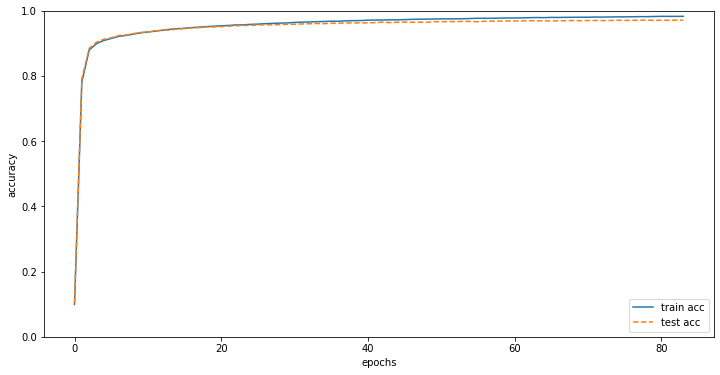

In [30]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

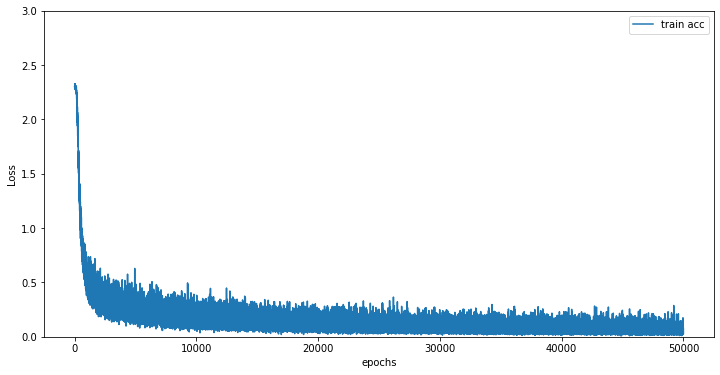

In [31]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()